# Comparación de agregados monetarios

El propósito de este notebook es comparar diferentes fuentes de información de agregados monetarios.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt 
from fredapi import Fred
from dotenv import load_dotenv
import os

load_dotenv()

fred = Fred(api_key=os.environ.get('FRED_API_KEY'))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

## Estados Unidos
### M3

In [116]:
# MANM (M1) y MABM (M3)
url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_MONAGG,4.0/USA.M.MABM.XDC..N...?format=csv'
s_oecd = pd.read_csv(url, parse_dates=['TIME_PERIOD'], date_format='%Y-%m', index_col=['TIME_PERIOD'])['OBS_VALUE'].sort_index()
s_shadowstats = pd.read_csv('data/m3-us.csv', sep=';', parse_dates=['Date'], index_col=['Date'])['m3']*1e3
s_fred = fred.get_series('M2NS')*1e3

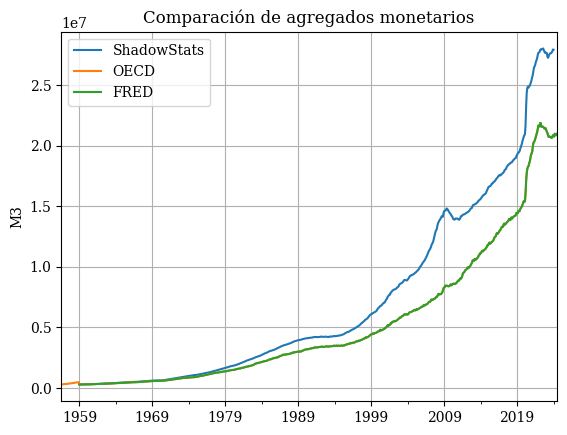

In [117]:
fig, ax = plt.subplots()
s_shadowstats.plot(ax=ax, label='ShadowStats')
s_oecd.plot(ax=ax, label='OECD')
s_fred.plot(ax=ax, label='FRED')

ax.set_xlabel('')
ax.set_ylabel('M3')
ax.set_title('Comparación de agregados monetarios')
ax.grid()
ax.legend()

### M1

In [118]:
s_fred = fred.get_series('M1NS')*1e3

url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_MONAGG,4.0/USA.M.MANM.XDC..N...?format=csv'
s_oecd = pd.read_csv(url, parse_dates=['TIME_PERIOD'], date_format='%Y-%m', index_col=['TIME_PERIOD'])['OBS_VALUE'].sort_index()

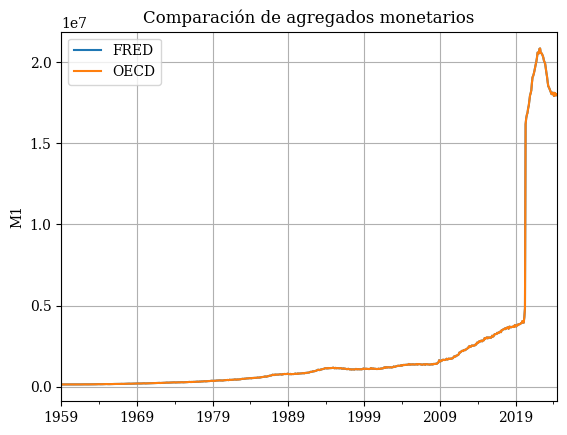

In [119]:
fig, ax = plt.subplots()
s_fred.plot(ax=ax, label='FRED')
s_oecd.plot(ax=ax, label='OECD')

ax.set_xlabel('')
ax.set_ylabel('M1')
ax.set_title('Comparación de agregados monetarios')
ax.grid()
ax.legend()

## Japón

In [120]:
url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_MONAGG,4.0/JPN.M.MABM.XDC..N...?format=csv'

s_oecd = pd.read_csv(url, parse_dates=['TIME_PERIOD'], date_format='%Y-%m', index_col=['TIME_PERIOD'])['OBS_VALUE'].sort_index()

In [121]:
s_boj = pd.read_csv('data/m3-jp.csv',
                          skiprows=3,
                          names=['Date', 'Value'],
                          parse_dates=['Date'],
                          date_format={'Date': '%Y/%m'},
                          index_col='Date')['Value']*100 # Monthly data, 100 million yen

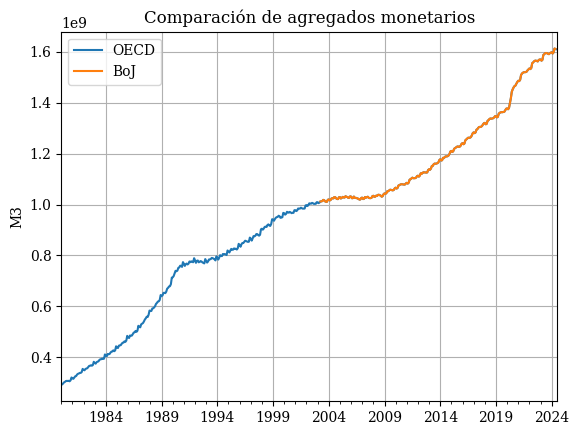

In [122]:
fig, ax = plt.subplots()
s_oecd.plot(ax=ax, label='OECD')
s_boj.plot(ax=ax, label='BoJ')

ax.set_xlabel('')
ax.set_ylabel('M3')
ax.set_title('Comparación de agregados monetarios')
ax.legend()
ax.grid()